<div align='center'>
    <h1>TUGAS PRAKTIKUM DFS</h1>

</div>

### 1. DFS

Buatlah graf berbobot (weighted graf) dari 2 gambar graf berikut ini menggunakan library NetworkX. Kemudian lakukan penelurusan Depth First Search menggunakan library NetworkX! Kemudian periksalah hasilnya secara manual! Untuk graf kota-kota besar di Eropa, kota asal (source)-nya adalah Arad. Untuk graf kota-kota Pulau Jawa, kota asal (source)-nya adalah Bandung. Periksa apakah informasi weight digunakan atau tidak pada algoritma Breadth First Search ini!

**A.** Graf Kota Besar Di Eropa.

In [150]:
import networkx as nx 
import matplotlib.pyplot as plt

In [151]:
pos = {
    'Oradea': (2, 7),
    'Zerind': (1, 6),
    'Arad': (0, 5),
    'Timisoara': (0, 3),
    'Lugoj': (1, 2),
    'Mehadia': (1, 1),
    'Drobeta': (0, 0),
    'Craiova': (2, 0),
    'Rimnicu Vilcea': (3, 3),
    'Sibiu': (3, 5),
    'Fagaras': (5, 5),
    'Pitesti': (4, 2),
    'Bucharest': (6, 1),
    'Giurgiu': (5, 0),
    'Urziceni': (7, 1),
    'Hirsova': (9, 1),
    'Eforie': (9, 0),
    'Vaslui': (8, 3),
    'Iasi': (9, 5),
    'Neamt': (7, 7)
}

In [152]:
def show_graph(G, pos=None, title='', path=None):
    plt.figure(figsize=(12, 10))
    
    if pos is None:
        pos = nx.spring_layout(G, k=0.5)
    
    nx.draw(
        G,
        pos,
        with_labels=True,
        node_color='lightgray',
        node_size=700,
        font_color="black",
        font_weight="bold",
        width=1.5,
        font_size=11,
        edgecolors='black'
    )
    
    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='red', node_size=700)
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2.5)
    
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(
        G,
        pos,
        edge_labels=edge_labels,
        font_color='blue',
        font_weight="bold",
        font_size=10
    )
    
    plt.margins(0.15)
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()

In [153]:
europe = nx.Graph()

In [154]:
cities = ['Oradea', 'Zerind', 'Arad', 'Timisoara', 'Lugoj', 'Mehadia', 'Drobeta', 
          'Craiova', 'Rimnicu Vilcea', 'Sibiu', 'Fagaras', 'Pitesti', 'Bucharest', 
          'Giurgiu', 'Urziceni', 'Hirsova', 'Eforie', 'Vaslui', 'Iasi', 'Neamt']

europe.add_nodes_from(cities)

/tmp/ipykernel_10555/208270980.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


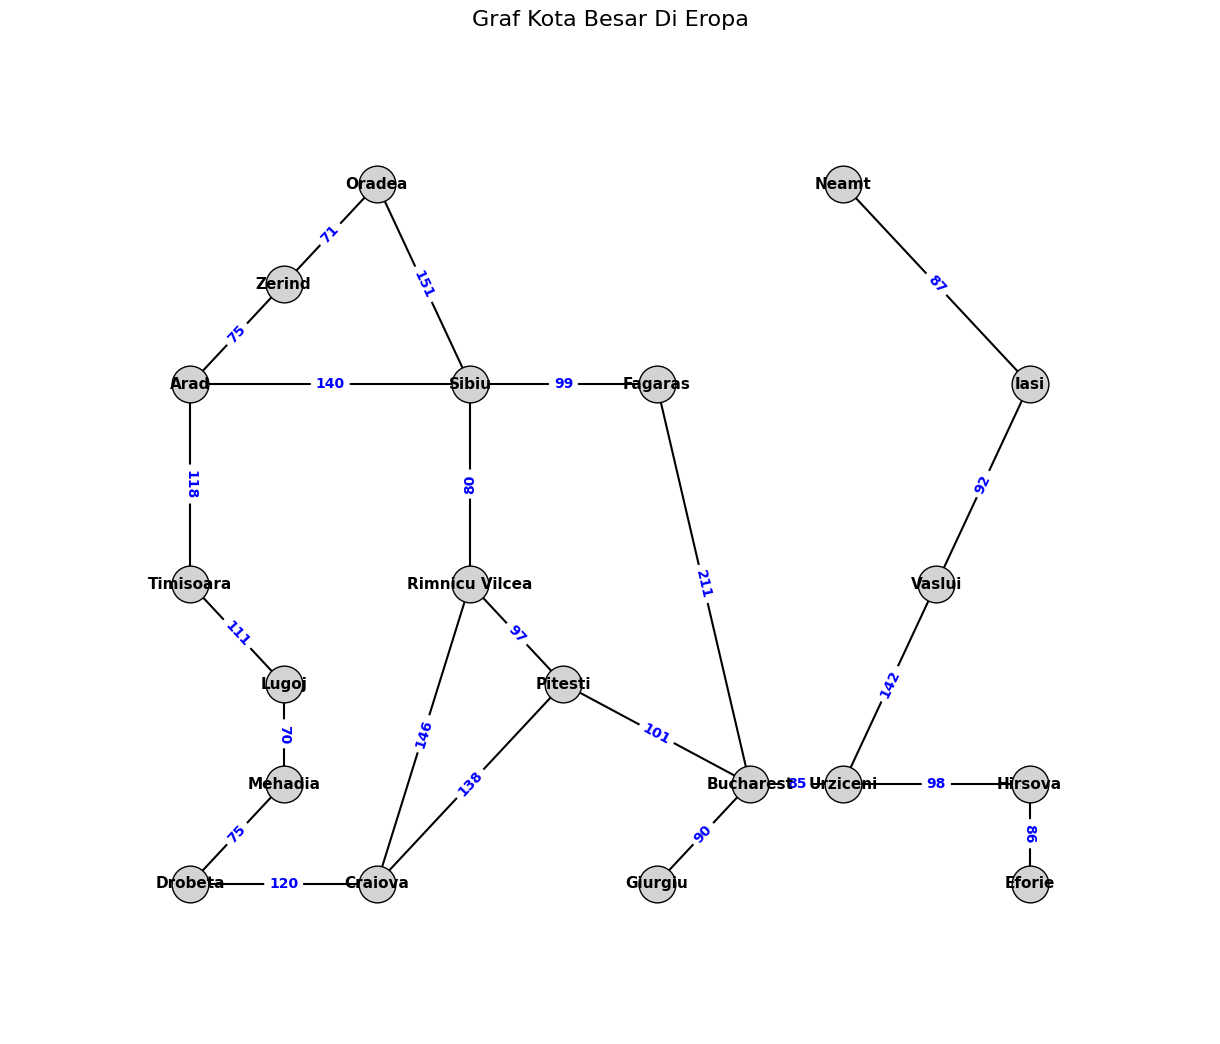

In [155]:
edges = [
    ('Oradea', 'Zerind', 71),
    ('Oradea', 'Sibiu', 151),
    ('Zerind', 'Arad', 75),
    ('Arad', 'Sibiu', 140),
    ('Arad', 'Timisoara', 118),
    ('Timisoara', 'Lugoj', 111),
    ('Lugoj', 'Mehadia', 70),
    ('Mehadia', 'Drobeta', 75),
    ('Drobeta', 'Craiova', 120),
    ('Craiova', 'Rimnicu Vilcea', 146),
    ('Craiova', 'Pitesti', 138),
    ('Rimnicu Vilcea', 'Sibiu', 80),
    ('Rimnicu Vilcea', 'Pitesti', 97),
    ('Sibiu', 'Fagaras', 99),
    ('Fagaras', 'Bucharest', 211),
    ('Pitesti', 'Bucharest', 101),
    ('Bucharest', 'Giurgiu', 90),
    ('Bucharest', 'Urziceni', 85),
    ('Urziceni', 'Hirsova', 98),
    ('Hirsova', 'Eforie', 86),
    ('Urziceni', 'Vaslui', 142),
    ('Vaslui', 'Iasi', 92),
    ('Iasi', 'Neamt', 87)
]

for source, target, weight in edges:
    europe.add_edge(source, target, weight=weight)

show_graph(europe, pos=pos, title="Graf Kota Besar Di Eropa")

/tmp/ipykernel_10555/208270980.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


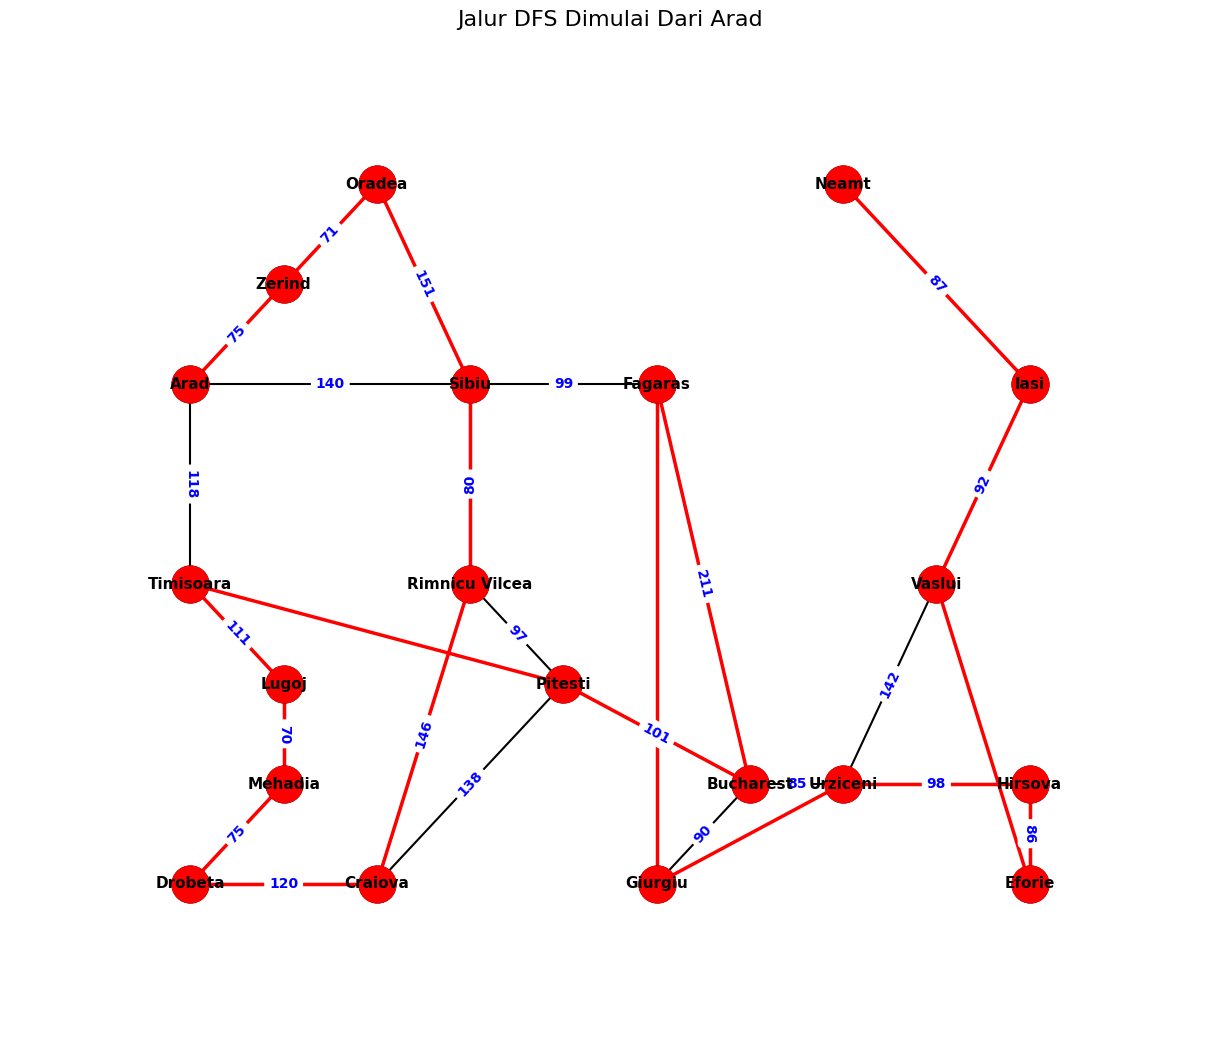

In [156]:
dfs_edges = list(nx.dfs_edges(europe, source='Arad'))
dfs_path = ['Arad']  # Start with the source node
for edge in dfs_edges:
    dfs_path.append(edge[1])  # Add the destination node of each edge

show_graph(europe, pos=pos, title="Jalur DFS Dimulai Dari Arad", path=dfs_path)

In [157]:
print("Jalur DFS dari Arad:")
print(" -> ".join(dfs_path))

Jalur DFS dari Arad:
Arad -> Zerind -> Oradea -> Sibiu -> Rimnicu Vilcea -> Craiova -> Drobeta -> Mehadia -> Lugoj -> Timisoara -> Pitesti -> Bucharest -> Fagaras -> Giurgiu -> Urziceni -> Hirsova -> Eforie -> Vaslui -> Iasi -> Neamt


**B.** Graf Kota Besar Di Indonesia(Jawa).

In [158]:
import networkx as nx 
import matplotlib.pyplot as plt

In [142]:
pos = {
    'Jakarta': (0, 5),
    'Bandung': (1, 3),
    'Cirebon': (2, 5),
    'Yogyakarta': (4, 3),
    'Semarang': (5, 5),
    'Surakarta': (6, 4),
    'Surabaya': (8, 5),
    'Malang': (8, 3)
}

In [143]:
def show_graph(G, pos=None, title='', path=None):
    # Set figure size
    plt.figure(figsize=(12, 8))
    
    if pos is None:
        pos = nx.spring_layout(G, k=0.5)
    
    # Draw all nodes and edges
    nx.draw(
        G,
        pos,
        with_labels=True,
        node_color='lightgray',
        node_size=700,
        font_color="black",
        font_weight="bold",
        width=1.5,
        font_size=11,
        edgecolors='black'
    )
    
    # Highlight path if provided
    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='red', node_size=700)
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2.5)
    
    # Draw edge weights
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(
        G,
        pos,
        edge_labels=edge_labels,
        font_color='blue',
        font_weight="bold",
        font_size=10
    )
    
    plt.margins(0.15)
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()

In [144]:
kota_jawa = nx.Graph()

In [145]:
kota = ['Jakarta', 'Bandung', 'Cirebon', 'Yogyakarta', 'Semarang', 'Surakarta', 'Surabaya', 'Malang']
kota_jawa.add_nodes_from(kota)

/tmp/ipykernel_10555/2584803510.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


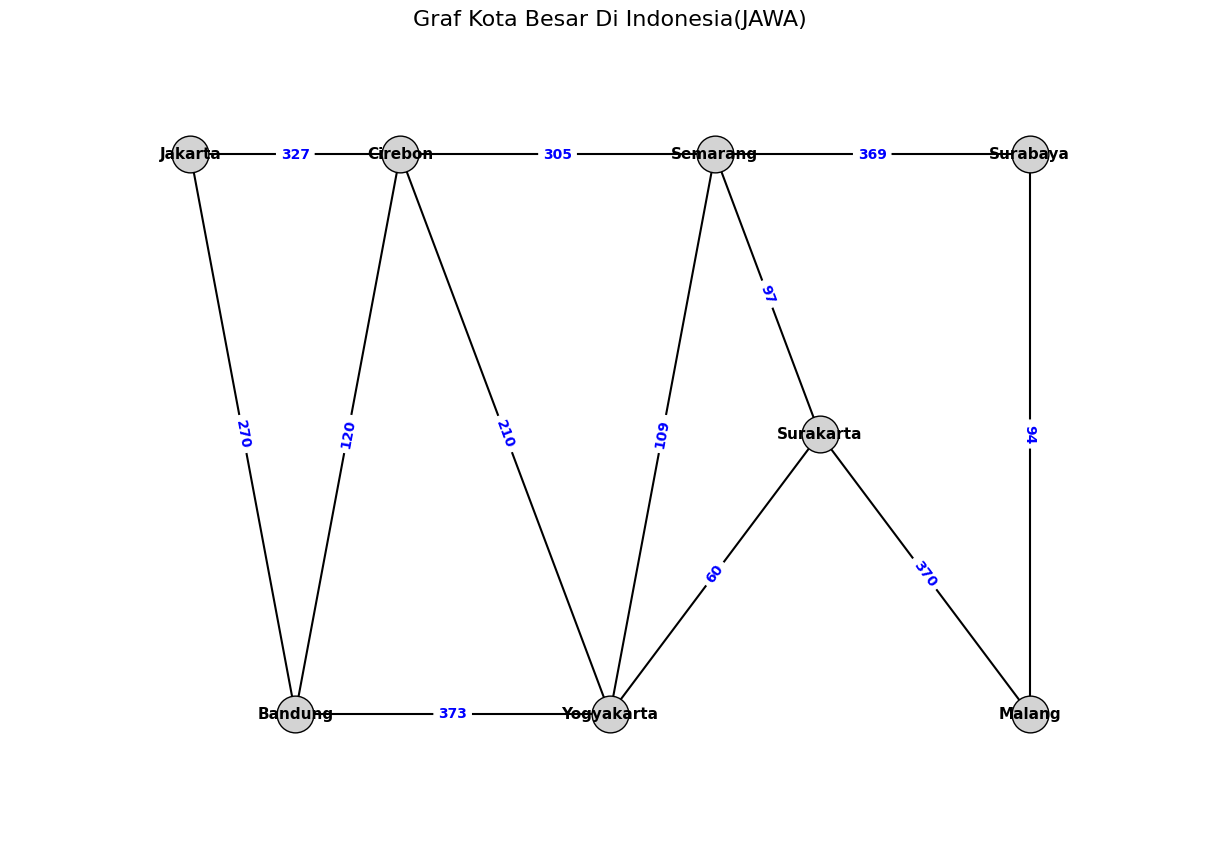

In [146]:
edges = [
    ('Jakarta', 'Cirebon', 327),
    ('Jakarta', 'Bandung', 270),
    ('Bandung', 'Cirebon', 120),
    ('Bandung', 'Yogyakarta', 373),
    ('Cirebon', 'Semarang', 305),
    ('Cirebon', 'Yogyakarta', 210),
    ('Yogyakarta', 'Semarang', 109),
    ('Yogyakarta', 'Surakarta', 60),
    ('Semarang', 'Surakarta', 97),
    ('Semarang', 'Surabaya', 369),
    ('Surakarta', 'Malang', 370),
    ('Surabaya', 'Malang', 94)
]

for source, target, weight in edges:
    kota_jawa.add_edge(source, target, weight=weight)

# Display the initial weighted graph
show_graph(kota_jawa, pos=pos, title="Graf Kota Besar Di Indonesia(JAWA)")

/tmp/ipykernel_10555/2584803510.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


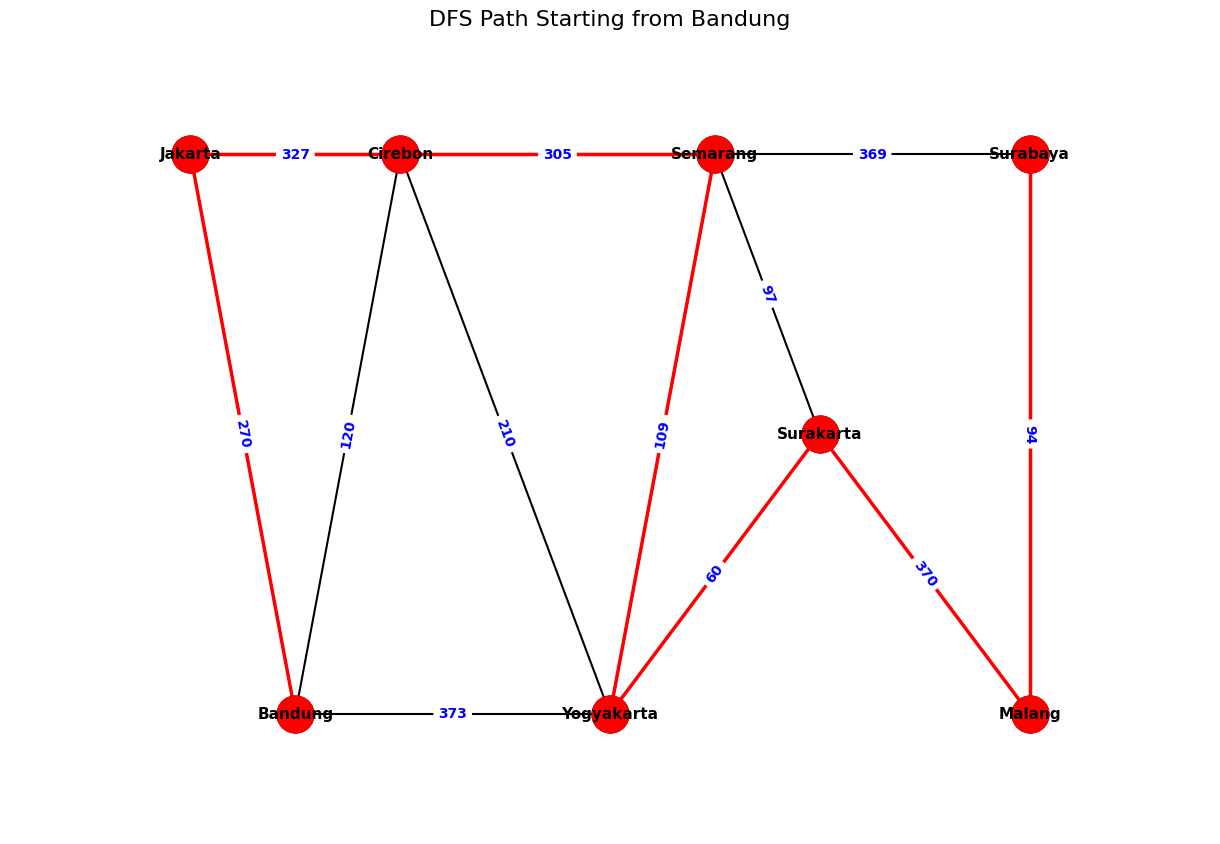

In [148]:
dfs_edges = list(nx.dfs_edges(kota_jawa, source='Bandung'))
dfs_path = ['Bandung']  # Start with the source node
for edge in dfs_edges:
    dfs_path.append(edge[1])  # Add the destination node of each edge

# Display the graph with DFS path highlighted
show_graph(kota_jawa, pos=pos, title="DFS Path Starting from Bandung", path=dfs_path)

In [84]:
print("DFS Path from Bandung:")
print(" -> ".join(dfs_path))

# Manual DFS implementation to verify if weights are used
def manual_dfs(graph, start, visited=None):
    if visited is None:
        visited = []
    
    visited.append(start)
    
    # Get neighbors with weights for analysis
    neighbors_with_weights = []
    for neighbor in graph.neighbors(start):
        if neighbor not in visited:
            weight = graph[start][neighbor]['weight']
            neighbors_with_weights.append((neighbor, weight))
    
    # Sort neighbors by weight for comparison
    weight_sorted = sorted(neighbors_with_weights, key=lambda x: x[1])
    weight_sorted_neighbors = [n for n, _ in weight_sorted]
    
    # Standard NetworkX alphabetical order for comparison
    standard_order_neighbors = sorted([n for n, _ in neighbors_with_weights])
    
    # Print neighbors and their orders for analysis
    if neighbors_with_weights:
        print(f"\nAt node {start}:")
        print(f"  Unvisited neighbors with weights: {neighbors_with_weights}")
        print(f"  Neighbors sorted by weight: {weight_sorted_neighbors}")
        print(f"  Neighbors in alphabetical order: {standard_order_neighbors}")
    
    # Continue DFS in standard alphabetical order (as NetworkX does by default)
    for neighbor in sorted(graph.neighbors(start)):
        if neighbor not in visited:
            manual_dfs(graph, neighbor, visited)
    
    return visited

DFS Path from Bandung:
Bandung -> Jakarta -> Cirebon -> Semarang -> Yogyakarta -> Surakarta -> Surabaya -> Malang
